In [1]:
import pandas as pd 

In [68]:
#he tenido que añadir lo de skip porque no me lo leia (lola)
df = pd.read_csv('brfss2013.csv', encoding='ISO-8859-1')



C:\Users\lolar\AppData\Local\Temp\ipykernel_23172\4235144204.py:2: DtypeWarning: Columns (11,14,50,53,102,103,104,105,108,111,112,113,118,119,120,121,122,123,125,126,127,130,132,134,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,177,178,179,180,181,182,183,184,185,186,187,188,190,191,192,193,194,195,197,199,200,201,202,203,204,205,206,207,208,209,210,211,212,216,226,227,228,229,230,312) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('brfss2013.csv', encoding='ISO-8859-1')


In [69]:
df.columns
df.head()

,X_state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,X_psu,ctelenum,...,X_pastae1,X_lmtact1,X_lmtwrk1,X_lmtscl1,X_rfseat2,X_rfseat3,X_flshot6,X_pneumo2,X_aidtst3,X_age80
0,Alabama,January,1092013.0,January,9.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Told have arthritis and have limited usual act...,Told have arthritis and have limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,NaN,NaN,No,60.0
1,Alabama,January,1192013.0,January,19.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,NaN,NaN,Yes,50.0
2,Alabama,January,1192013.0,January,19.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Told have arthritis and have limited usual act...,Told have arthritis and have limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,NaN,NaN,Yes,55.0
3,Alabama,January,1112013.0,January,11.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,NaN,NaN,No,64.0
4,Alabama,February,2062013.0,February,6.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,No,No,No,66.0


In [70]:
sample_number = int(df.shape[0]*0.30)

In [71]:
muestra = df.sample(n=sample_number)

### 1A) SAMPLING 
Hemos decidido hacer stratified sampling para respetar el número de casos en la muestra según el estado de salud. 
Nos quedamos con un 30% de la población total. Así nos aseguramos de que los diferentes subgrupos estén correctamente representados en la muestra. 


In [72]:
from sklearn.model_selection import train_test_split
# Supongamos que 'age_group' y 'gender' son columnas en el conjunto de datos
#remove NA from genhlth
df = df.dropna(subset=['genhlth'])

# Dividir el conjunto de datos en un subconjunto de muestra y otro que no se usará
# stratify=df[genlth] asegura que la muestra sea estratificada
# basándonos en las variables de estratificación especificadas
sample_df, _ = train_test_split(df, test_size=0.7, stratify=df["genhlth"])

# sample_df ahora contiene tu muestra estratificada

In [73]:
sample_df['genhlth'].value_counts()

genhlth
Very good    47723
Good         45166
Excellent    25645
Fair         20018
Poor          8385
Name: count, dtype: int64

### 1B) GENERAL EDA

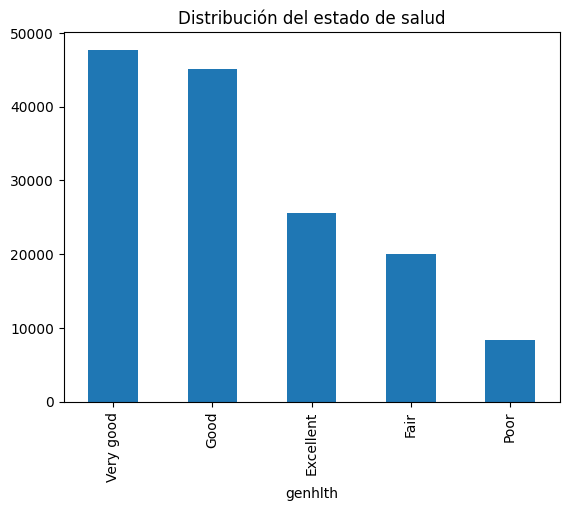

In [21]:
#Histograma según genhtlh
import matplotlib.pyplot as plt
sample_df['genhlth'].value_counts().plot(kind='bar')
plt.title("Distribución del estado de salud")
plt.show()

In [22]:
#Cambiamos el nombre de la columna a dating 
sample_df['marital'] = sample_df['marital'].apply(lambda x: 'Dating' if x == 'A member of an unmarried couple' else x)

In [23]:
sample_df['Health'] = sample_df['genhlth'].apply(lambda x: "Healthy" if x in ['Excellent', 'Very good','Good'] else "Not Healthy")


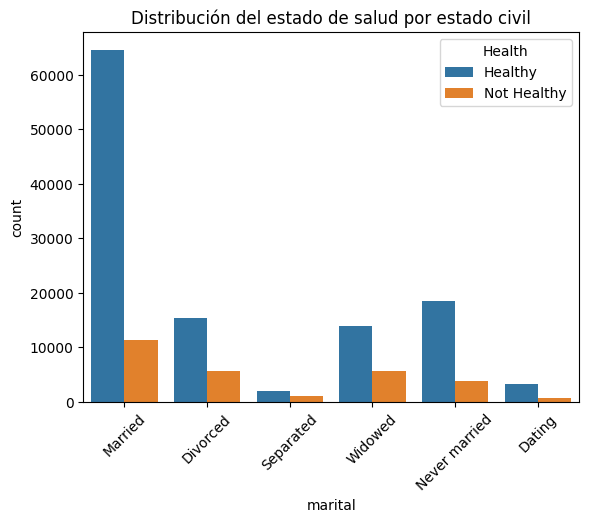

In [24]:

#grafico de barras apliado con marital status y health status 
import seaborn as sns
sns.countplot(x='marital', hue='Health', data=sample_df)
plt.title("Distribución del estado de salud por estado civil")
plt.xticks(rotation=45)
plt.show()


In [26]:
sample_df.columns

Index(['X_state', 'fmonth', 'idate', 'imonth', 'iday', 'iyear', 'dispcode',
       'seqno', 'X_psu', 'ctelenum',
       ...
       'X_lmtact1', 'X_lmtwrk1', 'X_lmtscl1', 'X_rfseat2', 'X_rfseat3',
       'X_flshot6', 'X_pneumo2', 'X_aidtst3', 'X_age80', 'Health'],
      dtype='object', length=331)

In [27]:

sns.countplot(x='mental_health', hue='alcohol', data=sample_df)
plt.title("Distribución del consumo de alcohol por salud mental")
plt.show()


ValueError: Could not interpret value `mental_health` for `x`. An entry with this name does not appear in `data`.

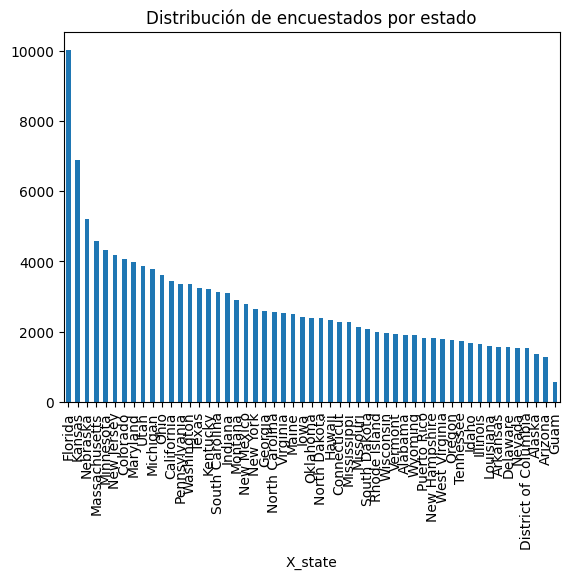

In [28]:
#Distribución del número de encuestados por estado de USA, haz un mapa. En X_state encontrarás el estado.
import plotly.express as px
sample_df['X_state'].value_counts().plot(kind='bar')
plt.title("Distribución de encuestados por estado")
plt.show()


In [29]:
sample_df['sex'].value_counts()

sex
Female    86965
Male      59972
Name: count, dtype: int64

In [30]:
sample_df['income2'].value_counts()

income2
$75,000 or more      34641
Less than $75,000    19572
Less than $50,000    18255
Less than $35,000    14468
Less than $25,000    12536
Less than $20,000    10454
Less than $15,000     8037
Less than $10,000     7553
Name: count, dtype: int64

In [31]:
income_male = sample_df[sample_df['sex'] == 'Male']['income2']

In [32]:
income_male = income_male.value_counts() 

In [33]:
income_female = sample_df[sample_df['sex'] == 'Female']['income2'].value_counts()

In [34]:
type(income_male)

pandas.core.series.Series

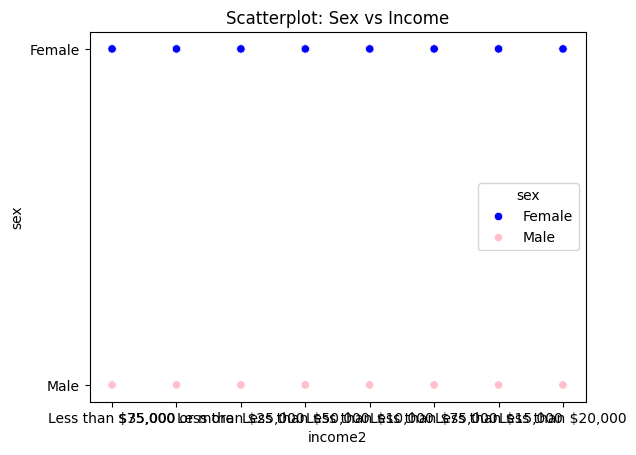

In [38]:
sns.scatterplot(x='income2', y='sex', data=sample_df, hue='sex', palette=['blue', 'pink'])
plt.title("Scatterplot: Sex vs Income")
plt.show()


# APARTADO 2 
### Pregunta 1 - ¿Están los hábitos de fumar de un adulto de EEUU y su grupo de edad asociados con la cantidad de días que informaron que su salud física no era buena?

Variables:
- X_smoker3 --> estatus del fumador con 4 niveles
- X_age_g   --> Edad en 6 grupos 
-  physhlth --> Número de días en el que la salud física no es buena

In [75]:
#quitamos los valores NA de las columnas que vamos a utilziar
df.dropna(subset=['X_smoker3', 'X_age_g', 'physhlth'], inplace=True)

In [99]:
#vemos los valores de la columna X_smoker3
df['X_smoker3'].value_counts()

X_smoker3
Never smoked                             255416
Former smoker                            134532
Current smoker - now smokes every day     53852
Current smoker - now smokes some days     20963
Name: count, dtype: int64

In [100]:
#Cambiamos el nombre de la columna 
sample_df['X_smoker3'] = sample_df['X_smoker3'].apply(lambda x: 'Smokes some days' if x == 'Current smoker - now smokes some days' else x)
sample_df['X_smoker3'] = sample_df['X_smoker3'].apply(lambda x: 'Smokes every day' if x == 'Current smoker - now smokes every day' else x)


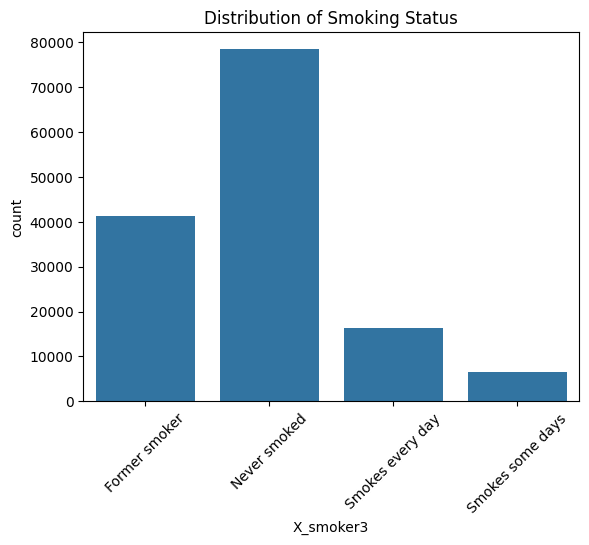

In [101]:
#rotame los titulos de x para que se vean mejor
plt.xticks(rotation=45)
sns.countplot(x='X_smoker3', data=sample_df)
plt.title('Distribution of Smoking Status')
plt.show()

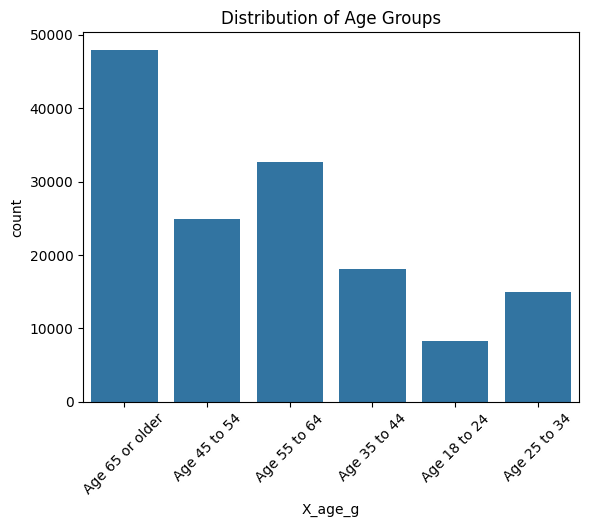

In [105]:
# Distribución de edades
plt.xticks(rotation=45)
sns.countplot(x='X_age_g', data=sample_df)
plt.title('Distribution of Age Groups')
plt.show()


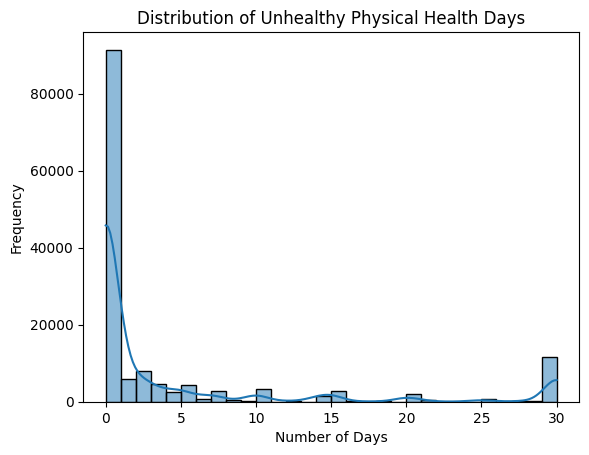

In [106]:
#Distribución de días de mala salud física
sns.histplot(sample_df['physhlth'], bins=30, kde=True)
plt.title('Distribution of Unhealthy Physical Health Days')
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.show()

C:\Users\lolar\AppData\Local\Temp\ipykernel_23172\140750035.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='X_smoker3', y='physhlth', hue='X_age_g', kind='bar', data=sample_df, ci=None)


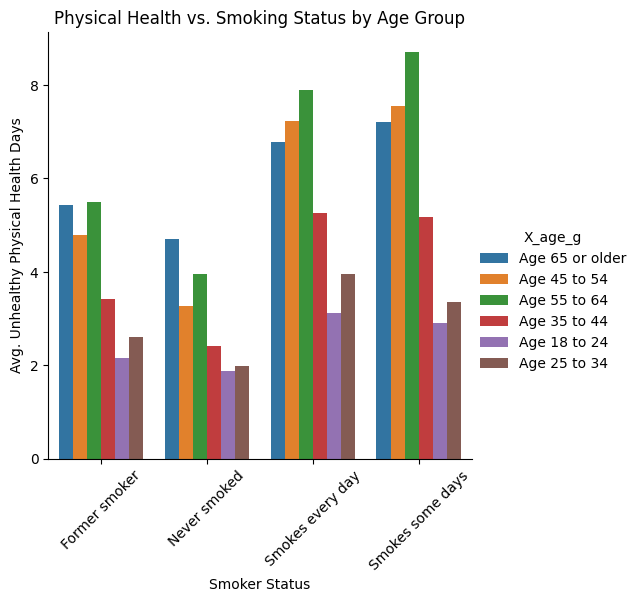

In [112]:
#relacion entre fumar y salud fisica y edad
#rotame el titulo de x para que se vea mejor
sns.catplot(x='X_smoker3', y='physhlth', hue='X_age_g', kind='bar', data=sample_df, ci=None)
plt.xticks(rotation=45)
plt.title('Physical Health vs. Smoking Status by Age Group')
plt.xlabel('Smoker Status')
plt.ylabel('Avg. Unhealthy Physical Health Days')
plt.show()


1. **Distribución del Estado de Fumador**: La primera gráfica muestra que el grupo más grande está son aquellas personas que nunca han fumado, seguido por los exfumadores. Los que fuman todos los días o algunos días representan una menor proporción de la población.

2. **Distribución de Grupos de Edad**: La segunda gráfica muestra que la mayoría de los encuestados están en el grupo de 65 años o más, seguido por el grupo de 55 a 64 años y luego el de 45 a 54 años. Los grupos más jóvenes son menos representativos en el dataset.

3. **Distribución de Días de Salud Física mala**: La tercera gráfica muestra que la mayoría de los encuestados dijeron que habían tenido pocos o ningún día de mala salud física. Hay algunas personas que dijeron todos los días como malos para su salud física, lo que podría indicar una enfermedad crónica o una condición persistente de mala salud.

4. **Salud Física vs. Estado de Fumador por Grupo de Edad**: En la última gráfica, vemos una comparación de los días promedio de mala salud física divididos por estado de fumador y grupo de edad. 


**Parece que aquellos que fuman todos los días o algunos días tienen más días de mala salud física en comparación con los no fumadores y los exfumadores, lo cual indica una asociación entre fumar y peores resultados de salud física. Además, este efecto parece variar con la edad, siendo más pronunciado en ciertos grupos de edad. Por ejemplo, los fumadores diarios en el grupo de 18 a 24 años y de 25 a 34 años reportan más días de mala salud física en promedio en comparación con los no fumadores de su mismo grupo de edad.

Por lo tanto, podemos decir que sí hay una asociación entre los hábitos de fumar de un adulto en EE.UU. y la cantidad de días que informaron que su salud física no era buena, y que esta asociación también está influenciada por el grupo de edad. Los efectos del tabaco en la salud física pueden ser más inmediatos en los fumadores más jóvenes o que los fumadores mayores han dejado de fumar.


In [116]:
import numpy as np
from scipy.stats import chi2_contingency
df['physhlth_cat'] = np.where(df['physhlth'] > df['physhlth'].median(), 'High', 'Low')

contingency_table = pd.crosstab(df['X_smoker3'], df['physhlth_cat'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Test:\nChi2 value: {chi2}\nP-value: {p}\nDegrees of Freedom: {dof}')

Chi-Square Test:
Chi2 value: 2869.5060762947833
P-value: 0.0
Degrees of Freedom: 3


Vemos la relación entre `X_smoker3` y `physhlth_cat`, que hemos dividido en dos niveles: "High" y "Low",

1. **Valor de Chi-Cuadrado**: Tenemos un valor muy alto, es el nivel de asociación entre variables.  

2. **P-value**: Tenemos un p bajo nulo indicando que es improbable que la asociación observada se deba al azar, y por lo tanto, rechazamos la hipótesis nula de independencia entre las variables.

3. **Grados de libertad**: (número de filas en la tabla - 1) x (número de columnas en la tabla de - 1). 4 -1  estados de fumador x 2 -1  categorías de salud física 


Los resultados sugieren que hay una relación significativa entre ser fumador y reportar más días de mala salud física. Sin embargo, la prueba no te dice nada sobre la fuerza de esta asociación ni sobre la dirección de la misma 